# Linear Regression

Linear regression is one of the simplest models there is. It assumes that there is a linear relation between the attributes to the target variable. It is very simple but it also works very good. 

"All models are wrong, but some are useful".  
-- <cite> George Box.
    
What it is trying to find is the relationship:
$$Y = \beta_{0} + \beta_{1}X$$
Which is basically the line equation. We want to find those coefficients, beta 0 and beta 1. It can be extended to n attributes and n + 1 unknown coefficients.

Here we are dealing with estimates, not the true value, so we can use the following formula:
    
$$\hat{y}_{i} = \hat{\beta}_{0} + \hat{\beta}_{1}*x_{i}$$

Which is the prediction of our regression. Then, we need the residual, which is:
$$e_{i} = y_{i} - \hat{y}_{i}$$
    
The true value minus the predicted value for the i point. The sum of all the squared errors is the function that the regression must minimize.
    $$RSS = e^{2}_{1} + e^{2}_{2} + ... + e^{2}_{n}$$
But we can expand that expression into:
$$RSS = (y_{1} - \hat{y}_{1})^{2} + (y_{2} - \hat{y}_{2})^{2} + ... + (y_{n} - \hat{y}_{n})^{2}$$

Even more:
$$RSS = (y_{1} - \hat{\beta}_{0} + \hat{\beta}_{1}*x_{1})^{2} + (y_{2} - \hat{\beta}_{0} + \hat{\beta}_{1}*x_{2})^{2} + ... + (y_{n} - \hat{\beta}_{0} + \hat{\beta}_{1}*x_{3})^{2}$$
    
They way of minimizing the RSS, the algorithm will find the $\beta_{0}$ and $\beta_{1}$ that optimize the function.
    
$$\hat{\beta_{1}} = \frac{\sum^{n}_{i=1} (x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum^{n}_{i=1} (x_{i}-\bar{x})^{2}}$$
$$\hat{\beta_{0}} = \bar{y} - \hat{\beta_{1}} * \bar{x}$$

Now, implement a linear regression without sklearn. In other words, find both coefficients and the Residual Sum of Squares (RSS). We are using a dataset about Teen Birth Rate. We want to predict the teen birth rate depending on the poverty of the state. The dataset is from the United States.

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [163]:
data = pd.read_csv('OLSDataset.txt',sep='\s+')

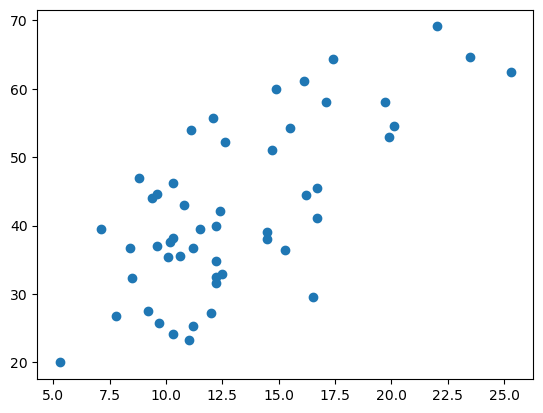

In [164]:
X=data['PovPct']
Y=data['TeenBrth']
plt.scatter(X, Y) 

In [165]:
XDiference = X - X.mean()
YDiference = Y - Y.mean()
V = np.dot(XDiference, YDiference)
beta1 = V / sum(np.power(X - X.mean(), 2))
beta2 = Y.mean() - beta1*X.mean()
Y_est = beta2 + beta1*X


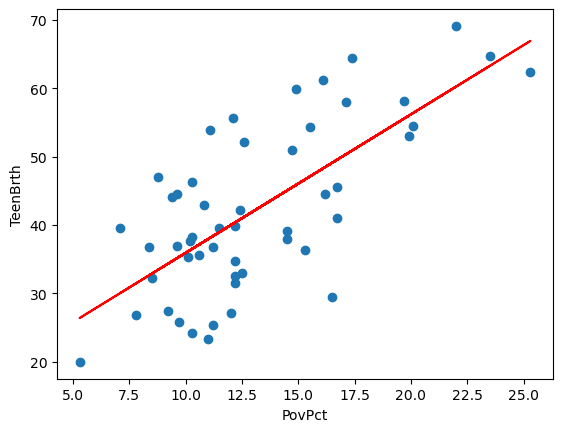

In [166]:
plt.scatter(X, Y) 
plt.plot(X,Y_est,color='r')
plt.xlabel("PovPct")
plt.ylabel("TeenBrth")

plt.show()

In [167]:
MSE = sum(np.power(Y - Y_est, 2)) / len(Y)
print(MSE)

75.18712192231092


## Exercise

This time, do it the right way. Do a regression for three different train and test divisions, and then calculate the MSE for each one. Plot the three regressions.

In [168]:

def plotting(X,Y, Y_est,attribute_1, attribute_2, title):
    
    plt.scatter(X, Y) 
    plt.plot(X,Y_est,color='r')
    plt.xlabel(attribute_1)
    plt.ylabel(attribute_2)
    plt.title(title)
    plt.show()
    

In [169]:
from sklearn.model_selection import train_test_split

def MSE(Y,Y_est):
    
    MSE = sum(np.power(Y - Y_est, 2)) / len(Y)
    
    return MSE

def LinearRegressionRSS(data, attribute_1, attribute_2,experiment):
    
    X=data[attribute_1]
    Y=data[attribute_2]

    XDiference = X - X.mean()
    YDiference = Y - Y.mean()
    V = np.dot(XDiference, YDiference)
    beta1 = V / sum(np.power(X - X.mean(), 2))
    beta2 = Y.mean() - beta1*X.mean()
    Y_est = beta2 + beta1*X

    #plotting(X,Y,Y_est, attribute_1, attribute_2,experiment)
    print('beta1:',beta1,'; beta2:',beta2)
    print('MSE ', experiment, ':', MSE(Y, Y_est))
    
    
    return beta1, beta2



    

In [170]:
# First Partition
train1, test1 = train_test_split(data, test_size=0.3)
train2, test2 = train_test_split(data, test_size=0.3)
train3, test3 = train_test_split(data, test_size=0.3)

In [171]:
attribute_1='PovPct'
attribute_2='TeenBrth'

# First Experiment
experiment='Training 1'
beta11,beta12=LinearRegressionRSS(train1, attribute_1, attribute_2,experiment)

Xtest_1=test1[attribute_1]
Ytest_1=test1[attribute_2]
Ytest_est_1=beta12+beta11*Xtest_1
#plotting(Xtest_1, Ytest_1,Ytest_est_1, attribute_1, attribute_2, 'Test 1')

print('MSE Test 1: ', MSE(Ytest_1, Ytest_est_1))



beta1: 2.3380316976074567 ; beta2: 11.44703341727687
MSE  Training 1 : 67.29235971132373
MSE Test 1:  98.09314226196355


In [172]:
# Second Experiment
experiment='Training 2'
beta21,beta22=LinearRegressionRSS(train2, attribute_1, attribute_2,experiment)

Xtest_2=test2[attribute_1]
Ytest_2=test2[attribute_2]
Ytest_est_2=beta22+beta21*Xtest_2
#plotting(Xtest_2, Ytest_2,Ytest_est_2, attribute_1, attribute_2, 'Test 2')

print('MSE Test 2: ', MSE(Ytest_2, Ytest_est_2))


beta1: 2.13361780641479 ; beta2: 13.546875332496985
MSE  Training 2 : 72.46858528247999
MSE Test 2:  83.40128213382552


In [173]:
# Third Experiment
experiment='Training 3'
beta31,beta32=LinearRegressionRSS(train3, attribute_1, attribute_2,experiment)

Xtest_3=test3[attribute_1]
Ytest_3=test3[attribute_2]
Ytest_est_3=beta32+beta31*Xtest_3
#plotting(Xtest_3, Ytest_3,Ytest_est_3, attribute_1, attribute_2, 'Test 3')

print('MSE Test 3: ', MSE(Ytest_3, Ytest_est_3))

beta1: 1.6844370284948555 ; beta2: 18.257756636390326
MSE  Training 3 : 69.74432100747993
MSE Test 3:  105.12302950394734


Experiment 1 - beta1: 2.3380316976074567  ; beta2: 11.44703341727687
Experiment 2 - beta1: 2.13361780641479  ; beta2: 13.546875332496985
Experiment 3 - beta1: 1.6844370284948555  ; beta2: 18.257756636390326


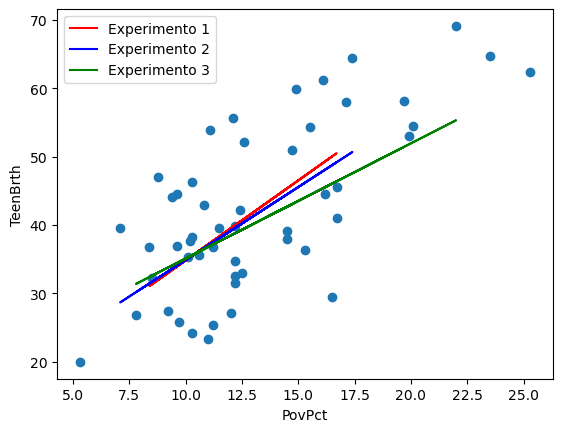

In [174]:
# Comparison of the three lines
print("Experiment 1 - beta1:", beta11, " ; beta2:", beta12)
print("Experiment 2 - beta1:", beta21, " ; beta2:", beta22)
print("Experiment 3 - beta1:", beta31, " ; beta2:", beta32)

X=data['PovPct']
Y=data['TeenBrth']

plt.scatter(X,Y)
plt.plot(Xtest_1,Ytest_est_1,color='r', label='Experimento 1')
plt.plot(Xtest_2,Ytest_est_2,color='b', label='Experimento 2')
plt.plot(Xtest_3,Ytest_est_3,color='g', label='Experimento 3')
plt.xlabel("PovPct")
plt.ylabel("TeenBrth")
plt.legend()

plt.show()



# Multiple Linear Regression

The same can be done but with multiple attributes. In this case, there will be one coefficient for each attribute:  

$$y = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + ... + \beta_{n}x_{n} + \epsilon$$  


Use the following dataset, to predict the G3 column. It is the grade of the year for the students. Multiple variables are categorical, remember to convert them to numerical. Other columns might not add value to the prediction, so you can also do some feature engineering. 

Usually while computing regression, we need to add a new column for the intercept term, in the data. That way we can do:
$$f(x') = \beta^{'T}x'$$
Because $\beta'$ will contain the intercept term, $\beta' = (\beta_{0},\beta_{1},...,\beta_{n})$

That gives us the following equation:

$$y = X*\beta+\epsilon$$

The optimization problem is to find the $\hat\beta$ that minimize the loss $L(\hat{\beta}) = \hat{\epsilon}^{T}\hat{\epsilon}$
The solution is:

$$\hat{\beta} = (X^{T}X)^{-1}X^{T}y$$

Inverting takes $O(n^{3})$ so it is unfeasible for datasets with many dimensions.

In [175]:
X = data[['PovPct','ViolCrime']]
y = data['TeenBrth']

In [176]:
X = X.to_numpy()
y = y.to_numpy()
X.shape
y.shape

(51,)

In [177]:
def multipleLinearRegression(X, y):
    
    # Columna de 1 para el intercepto (beta0)
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

    # Implementacion de la formula para encontrar los pesos e intercepto
    X_transpose = np.transpose(X)
    X_transpose_X = np.dot(X_transpose, X)
    X_transpose_X_inv = np.linalg.inv(X_transpose_X)
    X_transpose_y = np.dot(X_transpose, y)
    betas = np.dot(X_transpose_X_inv, X_transpose_y)

    return betas

In [178]:
betas=multipleLinearRegression(X,y)
print(betas)

[17.68480557  1.63044383  0.40366449]


In [179]:
import statsmodels.api as sm

# Polynomial Regression

What if the data is not linear? In that case, a linear regression wouldn't work because it does not capture how the data is. Then, we can try to fit a regression but in a with a higher polynomial. This can be done by transforming the data in the following way:


$$X = \begin{pmatrix}
1 & x_{1} & x_{1}^{2} & x_{1}^{3}\\
1 & x_{2} & x_{2}^{2} & x_{2}^{3}\\
\vdots & \vdots & \vdots & \vdots \\
1 & x_{3} & x_{3}^{2} & x_{3}^{3}\\
\end{pmatrix}$$

We take each input and take it into a higher polynomial. Also, include the intercept term. We can do it again by hand, but in this case, we are going to use our friend Sklearn.

In [180]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
def functionf(x):
    arr = []
    for i in x:
        arr.append(2-i+(i**2))
    return np.array(arr)

def sample_ds(n):
    x = np.random.uniform(-3,3,n)
    e = np.random.normal(0,0.4,n)
    y = np.add(functionf(x),e)
    return x,y

## Exercise

Train a linear regression for polynomials between 1 and 8, calculate the MSE for training set, validation set and test set. Generate a train set of 10 points, then a validation set of 10 points and then a test set of 1000 points. Fit a linear regression with polynomial features.

In [181]:
# Train, validation and test sets
x_train, y_train = sample_ds(10)
x_val, y_val = sample_ds(10)
x_test = np.random.uniform(-3, 3, 1000)
y_test = functionf(x_test) + np.random.normal(0, 0.4, 1000)

Text(0.5, 1.0, 'Training sample')

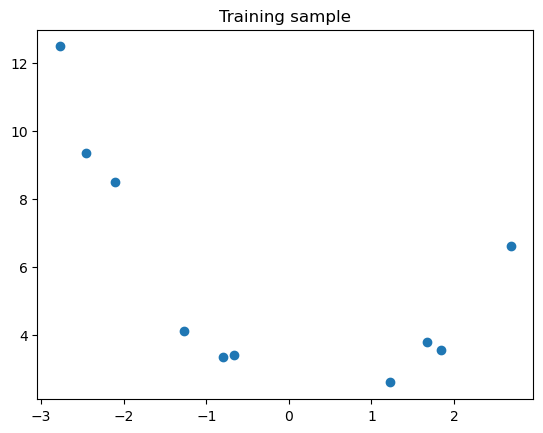

In [182]:
plt.scatter(x_train, y_train)
plt.title('Training sample')

In [183]:
def polynomial_plot(x,betas):
    return np.sum([betas[i] * (x ** i) for i in range(len(betas))], axis=0)

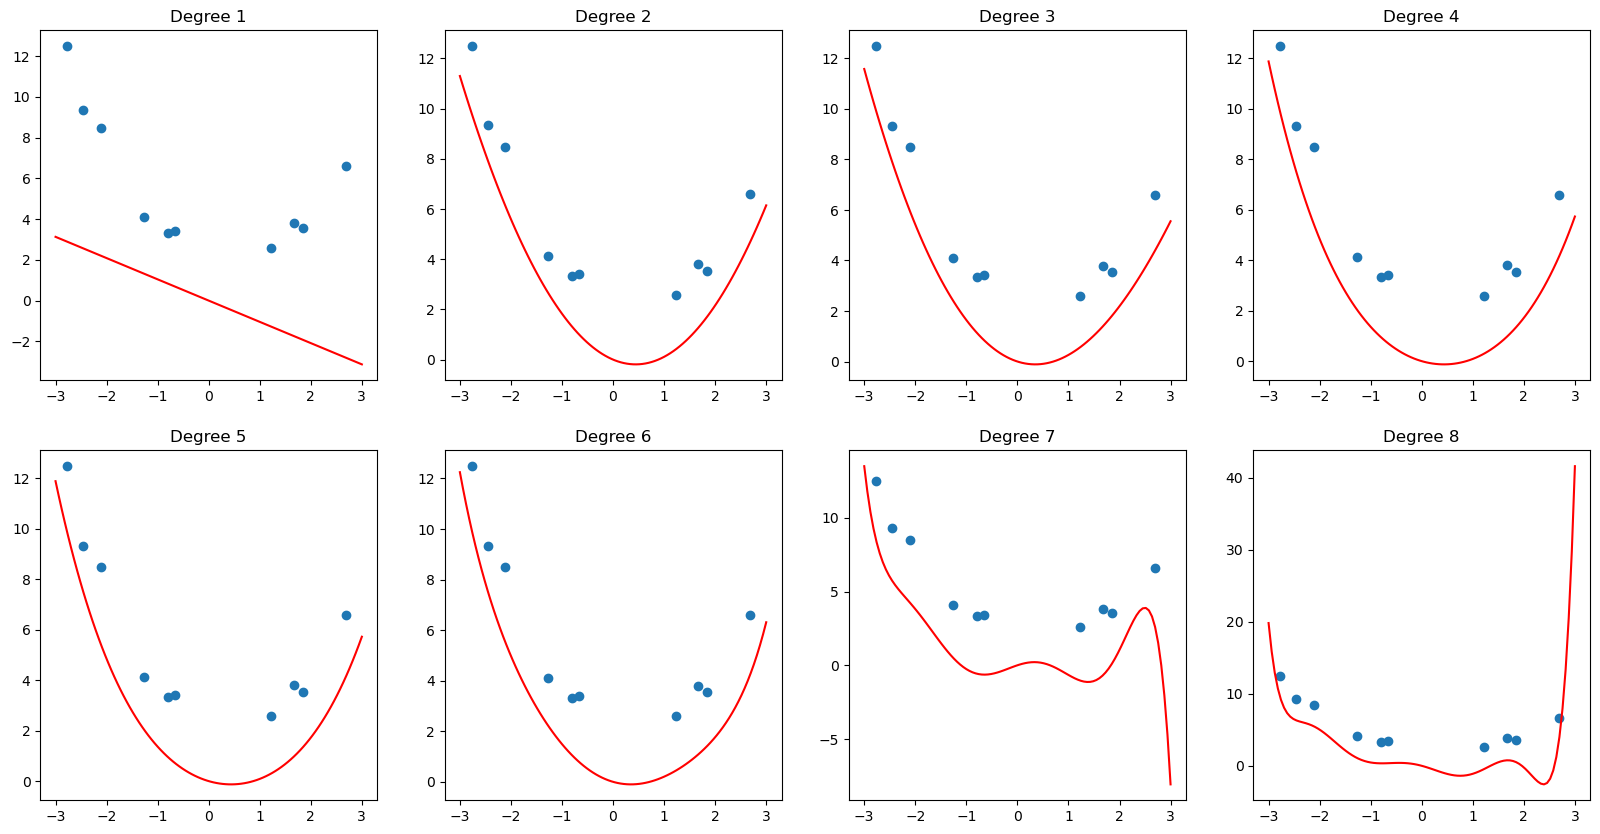

In [184]:
degrees = range(1,9)
train_MSEs=[]
val_MSEs=[]

#Gráficas múltiples
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.ravel()

for power in degrees:
    
    """Se usa PolynomialFeatures para generar matrix con características asociadas a cada potencia.
        Se usa make_pipeline para vincular las polynomial features a la regresion lineal que corresponde.
    """
    
    model = make_pipeline(PolynomialFeatures(power), LinearRegression())
    #Reshapes x_train to (10,1)
    Y_esti=model.fit(x_train.reshape(-1, 1), y_train)
    betas = model.named_steps['linearregression'].coef_
    
    x_plot = np.linspace(-3, 3, 100)
    y_plot = polynomial_plot(x_plot, betas)
    y_plot = polynomial_plot(x_plot, betas)
    axs[power-1].scatter(x_train, y_train)
    axs[power-1].plot(x_plot, y_plot, color='r')
    axs[power-1].set_title(f'Degree {power}')

      
    train_mse = MSE(y_train, model.predict(x_train.reshape(-1, 1)))
    val_mse = MSE(y_val, model.predict(x_val.reshape(-1, 1)))
    
    #plt.plot(x_train, Y_esti)
    #plotting(x_train,y_train,Y_esti,'x','y','Polynomial of degree'+str(power))
    
    train_MSEs.append(train_mse)
    val_MSEs.append(val_mse)
    
    

In [185]:
print(train_MSEs)
print(val_MSEs)

[6.090810935998119, 0.17147968879855052, 0.14656052909332545, 0.12511151873169118, 0.12510918474715543, 0.1240934261642185, 0.09423897742906141, 0.0002009236067549062]
[8.078770343213709, 0.3296311945622127, 0.35418798110937655, 0.3665423232842547, 0.36518055767583685, 0.3522753528349551, 2.016769470488904, 2.885466215218469]


In [186]:
#Test
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train.reshape(-1, 1), y_train)
    y_pred_train = model.predict(x_train.reshape(-1, 1))
    y_pred_val = model.predict(x_val.reshape(-1, 1))
    y_pred_test = model.predict(x_test.reshape(-1, 1))
    mse_train = MSE(y_train, y_pred_train)
    mse_val = MSE(y_val, y_pred_val)
    mse_test = MSE(y_test, y_pred_test)
    print(f"Degree: {degree}, Train MSE: {mse_train:.4f}, Validation MSE: {mse_val:.4f}, Test MSE: {mse_test:.4f}")

Degree: 1, Train MSE: 6.0908, Validation MSE: 8.0788, Test MSE: 7.2509
Degree: 2, Train MSE: 0.1715, Validation MSE: 0.3296, Test MSE: 0.2115
Degree: 3, Train MSE: 0.1466, Validation MSE: 0.3542, Test MSE: 0.2398
Degree: 4, Train MSE: 0.1251, Validation MSE: 0.3665, Test MSE: 0.3129
Degree: 5, Train MSE: 0.1251, Validation MSE: 0.3652, Test MSE: 0.3118
Degree: 6, Train MSE: 0.1241, Validation MSE: 0.3523, Test MSE: 0.3058
Degree: 7, Train MSE: 0.0942, Validation MSE: 2.0168, Test MSE: 3.4112
Degree: 8, Train MSE: 0.0002, Validation MSE: 2.8855, Test MSE: 19.6969
